# Latar belakang
Airbnb bukanlah situs yang asing bagi para orang yang sering melakukan traveling. Startup ini menyediakan jasa sewa properti, seperti hotel, apartemen, hostel dan juga villa di seluruh dunia. Startup ini tentunya memudahkan wisatawan atau traveller untuk mencari penginapan di destinasi yang menjadi tempat tujuan.

Seperti yang kita ketahui bahwa Ibu kota Thailand, Bangkok menduduk peringkat teratas atau pertama sebagai kota yang paling banyak di kunjungi di dunia sepanjang tahun 2023 (sumber CNN Indonesia). Tentunya Airbnb bisa memudahkan para wisatawan yang berkunjung ke Bangkok untuk mendapatkan penginapan dengan kriteria yang di inginkan.

# Pernyataan masalah
Pada listing Airbnb di Bangkok ini, untuk meningkatkan revenue kita bisa mencari tahu wilayah mana saja dan juga ruangan tipe apa yang paling sering dan paling jarang di pilih oleh para tamu(guest) sebagai tempat untuk menginap. Kita juga perlu mencari tahu apakah harga mahal dan murah mempengaruhi pemilihan wilayah dan tipe ruangan.

# dataset yang digunakan
dataset ini berisi tentang informasi yang dapat membantu kita dalam mengolah dan menganalisis data. dataset ini sendiri terdiri dari 16 kolom dengan penjelasan sebagai berikut :
- id : Pengidentifikasi unik Airbnb untuk listing.
- name : Nama dari listing.
- host_id : Pengidentifikasi unik Airbnb untuk host/pengguna.
- host_name : Nama host. Biasanya hanya nama depan.
- neighborhood : Wilayah lingkungan digeokode menggunakan garis lintang dan bujur terhadap lingkungan yang ditentukan oleh shapefile digital terbuka atau publik.
- latitude : Menggunakan proyeksi World Geodetic System (WGS84) untuk garis lintang dan bujur.
- longitude : Menggunakan proyeksi World Geodetic System (WGS84) untuk garis lintang dan bujur.
- room_type : [Entirehome/apt |Privateroom|Sharedroom|Hotel]
- price	: Harga harian dalam mata uang lokal. Perhatikan bahwa simbol $ mungkin digunakan terlepas dari lokasi.
- minimum_nights : Jumlah minimum malam menginap untuk listing (aturan kalender dapat berbeda).
- number_of_reviews : Jumlah ulasan yang dimiliki listing tersebut.
- last_review : Tanggal ulasan terakhir atau terbaru.
- reviews_per_month : review per bulan
- calculated_host_listings_count : Jumlah listing yang dimiliki host dalam pengambilan data saat ini di geografi kota/region.
- availability_365 : availability_x. Kalender menentukan ketersediaan listing x hari ke depan. Perhatikan bahwa sebuah listing mungkin tersedia karena telah dipesan oleh tamu atau diblokir oleh host.
- number_of_reviews_ltm	: Jumlah ulasan yang dimiliki listing dalam 12 bulan terakhir.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import normaltest
import warnings
warnings.filterwarnings('ignore')

membaca dataset Airbnb Listings Bangkok.csv dan menampilkan 5 data teratas dan juga 5 data terbawah

In [3]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


# **Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Sebelumnya ketika menampilkan dataset yang akan kita gunakan, saya perhatikan kolom 'Unnamed: 0' memiliki nilai sesuai dengan index. Maka dari itu saya ingin melihat dulu apakah ada data unik selain 'Unnamed: 0', jika ada maka kita bisa menggunakan data tersebut sebagai data unik di dataset ini, sedangkan kolom 'Unnamed: 0' bisa kita drop saja karena tidak di butuhkan. Disini kita bisa cek data unik yang dimiliki dataset yang kita gunakan :

In [5]:
dataDesc = []
for i in df.columns:
	dataDesc.append([
			i,	
			df[i].nunique()])
pd.DataFrame(dataDesc, columns=[
				"Data Features",				
				"Unique"])

,Data Features,Unique
0,Unnamed: 0,15854
1,id,15854
2,name,14794
3,host_id,6659
4,host_name,5312
5,neighbourhood,50
6,latitude,9606
7,longitude,10224
8,room_type,4
9,price,3040


Bisa di lihat dari output di atas, selain kolom 'Unnamed: 0', kita memiliki kolom 'id' yang merupakan data/pengenal dengan nilai yang unik dan bisa di gunakan. sehingga kita bisa melakukan drop pada kolom 'Unnamed: 0'

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


# Missing Value #
kita bisa coba cek **missing value** yang ada pada dataset.

In [7]:
missing_values = df.isna().sum()
missing_values

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

terdapat missing value pada kolom name, host_name, last_review dan juga reviews_per_month. bisa kita cek dulu presentase missing value dari kolom-kolom pada dataset.

In [8]:
dataDesc = []
dataMissing = df[['name','host_name','last_review','reviews_per_month']]
for i in dataMissing:
	dataDesc.append([
			i,	
			round((dataMissing[i].isna().sum() / len(df)) * 100, 2)])
pd.DataFrame(dataDesc, columns=[
				"Data Features",				
				"Null Percentage"])

,Data Features,Null Percentage
0,name,0.05
1,host_name,0.01
2,last_review,36.52
3,reviews_per_month,36.52


bisa di lihat dari data di atas, missing value pada kolom name dan host_name sangat kecil. Sedangkan missing value pada kolom last_review dan reviews_per_month sangat besar sekitar 36.52%. maka dari itu kita hanya bisa menghapus missing value pada kolom name dan host_name, sedangkan untuk penanganan missing value pada kolom last_review dan reviews_per_month perlu kita pelajari data pada kolom-kolom tersebut.

In [9]:
df.dropna(subset=['name','host_name'],inplace=True)

In [10]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

kolom last_review dan reviews_per_month masih memiliki missing value. disini kita perlu menganalisis data pada kedua kolom tersebut. kedua kolom sama-sama memiliki missing value sebanyak 5784, kemudian data pada kolom last_review merupakan tanggal ulasan terakhir/terbaru. kita harus memeriksa lebih dulu apakah missing value pada kedua kolom tersebut saling berkaitan atau tidak. 

sebelumnya kita kembalikan tipe data dari last_review dari object menjadi DateTime.

In [11]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [12]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

Untuk melihat missing value pada kedua kolom last_review dan reviews_per_month saling berkaitan atau tidak, kita bisa menggunakan kolom number_of_reviews yang menunjukkan Jumlah ulasan yang dimiliki listing tersebut. karena bisa saja kedua kolom tersebut kosong karena memang belum ada ulasan yang dimiliki listing tersebut. sehingga disini kita mengkondisikan number_of_reviews bernilai 0.

In [13]:
df[df['number_of_reviews'] == 0][['number_of_reviews', 'last_review','reviews_per_month']]

,number_of_reviews,last_review,reviews_per_month
1,0,NaT,NaN
2,0,NaT,NaN
4,0,NaT,NaN
7,0,NaT,NaN
14,0,NaT,NaN
...,...,...,...
15849,0,NaT,NaN
15850,0,NaT,NaN
15851,0,NaT,NaN
15852,0,NaT,NaN


seperti asumsi yang sudah di bahas sebelumnya, jika di lihat berdasarkan data di atas (jumlah missing value pada kedua kolom sama dengan jumlah data dengan number_of_reviews = 0), memang benar bahwa kolom last_review dan reviews_per_month tidak memiliki isi karena memang belum ada ulasan yang dimiliki listing tersebut.

di karenakan sudah ada kolom number_of_reviews yang menunjukkan Jumlah ulasan yang dimiliki listing serta ada juga kolom number_of_reviews_ltm yang menunjukkan Jumlah ulasan yang dimiliki listing dalam 12 bulan terakhir, maka kolom last_review dan reviews_per_month yang memiliki banyak jumlah missing value sepertinya tidak di perlukan untuk di analisis dan bisa kita drop saja.

In [14]:
df.drop(columns=['last_review','reviews_per_month'], inplace=True)
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,14,365,0


setelah menangani missing value, kita bisa mengecek dan menangani data yang duplicate.

In [15]:
df.duplicated().sum()

np.int64(0)

Karena tidak ada data yang duplicate, kita perlu cek lagi apakah ada data anomali lain

In [16]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.584500e+04,1.584500e+04,15845.000000,15845.000000,1.584500e+04,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000
mean,1.580294e+17,1.541645e+08,13.745148,100.559895,3.218580e+03,15.299905,16.663048,13.896813,244.319281,3.483496
std,2.946611e+17,1.318845e+08,0.043044,0.050915,2.497917e+04,50.828453,40.623125,30.276935,125.849614,8.919083
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104514e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,1.000000,138.000000,0.000000
50%,3.505717e+07,1.224556e+08,13.738490,100.561400,1.429000e+03,1.000000,2.000000,4.000000,309.000000,0.000000
75%,5.258780e+07,2.392258e+08,13.759490,100.585140,2.429000e+03,7.000000,13.000000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type
count,15845,15845,15845,15845
unique,14793,5306,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2151,8911


In [17]:
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,1,0,0


jika dilihat dari deskripsi data, dapat kita ketahui : 
- Di Bangkok terdapat 5306 host yang memiliki listing dengan frekuensi listing 1 - 228 dan tersebar di 50 wilayah (neighborhood)
- nilai minimum dari number_of_reviews adalah 0, berarti terdapat 2 kemungkinan, listing tersebut memang belum pernah di sewa atau cukup banyak tamu(guest) yang memang tidak memberikan review meskipun sudah menginap.
- pada kolom price nilai minimalnya adalah 0. Sedangkan untuk price, tidak mungkin bernilai harga penginapan bernilai 0 (gratis). saat di cek dengan menampilkan data dengan price bernilai 0, terdapat 1 data saja, sehingga data tersebut bisa di asumsikan salah input dan bisa kita hapus saja.

In [18]:
df.drop(df[df['price'] == 0].index, inplace=True)

setelah data di bersihkan, bisa kita lihat sekilas informasi yang sudah di berishkan. kemudian kita bisa melanjutkan untuk mengecek outliers.

In [19]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15844, 14)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15844,"[763667089052154824, 16933740]"
1,name,object,0,14792,[Modern 1 BR APT+extra balcony-Sathon-Lumpini ...
2,host_id,int64,0,6650,"[49227061, 460143004]"
3,host_name,object,0,5305,"[Thanakit, Theatre Residence]"
4,neighbourhood,object,0,50,"[Ratchathewi, Khlong Sam Wa]"
5,latitude,float64,0,9602,"[13.7622, 13.66773]"
6,longitude,float64,0,10222,"[100.58169, 100.5763]"
7,room_type,object,0,4,"[Private room, Hotel room]"
8,price,int64,0,3039,"[2144, 879]"
9,minimum_nights,int64,0,86,"[356, 208]"


# Outliers 

In [20]:
def Cek_outlier(df, col):
					Q1 = df[col].describe()['25%']
					Q3 = df[col].describe()['75%']
					IQR = Q3 - Q1
					upper_fence = Q3 + (1.5 * IQR)
					lower_fence = Q1 - (1.5 * IQR)
					df_outliers = df[(df[col] <  lower_fence) | (df[col] > upper_fence)]
					if len(df_outliers) == 0:
						return 'no outliers'
					else:						
						return df_outliers

In [21]:
Cek_outlier(df,'price')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,6,180,0
18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.733780,100.563030,Entire home/apt,5680,28,148,1,334,0
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,1,349,3
34,978531,Urban Oasis in the heart of Bangkok,5309669,Apiradee,Sathon,13.722910,100.537590,Entire home/apt,5429,2,3,3,174,0
48,185364,Beautiful Wood Bangkok Resort House,889670,Narumon,Nong Chok,13.779000,100.836710,Entire home/apt,8658,1,0,1,363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,786741911434733026,Private Home for 12-16 Guests 8 Parking,435016000,Tadchon,Lat Phrao,13.827958,100.591895,Entire home/apt,17900,2,0,10,362,0
15757,786742271004207966,Private Hotel for 12-16 Guests,435016000,Tadchon,Chatu Chak,13.821809,100.563067,Private room,17900,2,0,10,362,0
15765,786834873763460489,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.735632,100.567862,Entire home/apt,7589,1,0,44,364,0
15766,786852847114140309,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.734753,100.566682,Entire home/apt,7589,1,0,44,364,0


In [23]:
Cek_outlier(df,'number_of_reviews')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.541340,Entire home/apt,1905,3,65,2,353,0
11,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.77486,100.542720,Entire home/apt,1893,15,129,1,356,1
12,55686,Comfy bedroom near River pier & BTS Taksin.,263049,Tor,Sathon,13.71802,100.515390,Hotel room,1862,2,208,7,361,0
16,1791481,Nice and Quiet condo near BTS Onnut,9399478,Piyakorn,Khlong Toei,13.70719,100.599360,Entire home/apt,1577,30,78,1,330,0
18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.73378,100.563030,Entire home/apt,5680,28,148,1,334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,640493624884896939,Sukhumvit 1-bedroom apartment GP House - COZY,171603843,Arisudan Gopal,Suanluang,13.70872,100.605790,Entire home/apt,650,1,37,11,303,37
13168,623699400990285914,1网红50层超豪华空中泳池健身房Asoke商圈市中心双轨BTS/MRT+Nana/Soico...,129986395,Ed,Vadhana,13.73968,100.562670,Entire home/apt,2150,1,33,13,278,33
13172,624225259936181515,CENTRAL & CLASSY ※ 5-min Skytrain ASOK ※ NICE ...,30386490,N'Dee,Khlong Toei,13.73632,100.558840,Entire home/apt,4950,1,34,23,40,34
13177,656164225695350804,1 Bedroom Suite [Silom-Sathorn],340150263,Bandara,Bang Rak,13.72581,100.538228,Private room,3571,1,101,18,304,101


In [24]:
Cek_outlier(df,'number_of_reviews_ltm')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
28,145343,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,1,349,13
43,988373,BangLuang House 2@ Bangkok Thailand,5325919,วสวัตติ์,Phasi Charoen,13.731220,100.462280,Entire home/apt,1795,1,95,3,339,10
47,1862377,☞Downtown Central Studio-Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,8,331,9
49,1887544,"""Serviced 2 Bed Scenic SkyVillas""",6132593,Salvatore,Sathon,13.720960,100.529110,Entire home/apt,3757,2,118,7,134,12
53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,7,320,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,750360890702349752,Bangkok Cheesy room by The Locals - (newly ope...,483119696,The Locals,Phra Nakhon,13.758960,100.492380,Entire home/apt,1223,1,15,10,300,15
14903,750391908732827657,Bangkok Cheesy room by The Locals - (newly ope...,483119696,The Locals,Phra Nakhon,13.760595,100.492367,Entire home/apt,1322,1,13,10,312,13
14904,750392237778434745,Bangkok The locals - Ideal room for family/fri...,483119696,The Locals,Phra Nakhon,13.760731,100.492206,Entire home/apt,1537,1,15,10,302,15
14918,751025303076300052,Breathtaking River View 5min walk-train cozy room,315867023,Alex,Bang Rak,13.723820,100.524260,Entire home/apt,3683,2,8,3,306,8


kolom price, number_of_reviews, dan number_of_reviews_ltm adalah kolom yang akan kita analisis, setelah kita periksa ternyata pada kolom-kolom tersebut terdapat data outliers. sehingga handling untuk outliers disini kita keep data. jika data kita keep, untuk analisisnya kita harus menggunakan median, serta untuk uji statistik kita gunakan non parametrik.

# Data Analysis #

Setelah kita melakukan data cleaning, kita bisa mulai analisis untuk menjawab permasalahan dan juga untuk mencari tahu karakteristik apa saja yang berpengaruh dalam meningkatkan revenue.

analisa akan berfokus pada wilayah dan jenis kamar yang paling banyak dan paling sedikit diminati berdasarkan review dan juga harga. sehingga kita bisa merekomendasikan solusi untuk meningkatkan revenue.

### Berdasarkan neighbourhood (wilayah), room_type (tipe ruangan), number_of_reviews (jumlah review dari listing), number_of_reviews_ltm (jumlah listing selama 12 bulan terakhir) & price (harga) ###

- wilayah mana yang paling banyak memiliki tamu(guest) berdasarkan review?
- wilayah mana yang memiliki review paling banyak dalam 12 bulan terakhir?
- tipe ruangan apa yang paling banyak dipilih tamu(guest) dari wilayah yang paling banyak dipilih tamu(guest)?
- tipe ruangan apa yang paling banyak dipilih tamu(guest) dari wilayah yang paling banyak dipilih tamu(guest) selama 12 bulan terakhir?
- wilayah mana yang paling sedikit memiliki tamu(guest) berdasarkan review?
- wilayah mana yang memiliki review paling sedikit dalam 12 bulan terakhir?
- tipe ruangan apa yang paling banyak dipilih tamu(guest) dari wilayah yang paling sedikit dipilih tamu(guest)?
- tipe ruangan apa yang paling banyak dipilih tamu(guest) dari wilayah yang paling sedikit dipilih tamu(guest) selama 12 bulan terakhir?
- apakah harga berpengaruh pada pemilihan tipe ruangan?

#### wilayah mana yang paling banyak memiliki tamu(guest) berdasarkan review?

In [25]:
# wilayah mana yang paling banyak memiliki tamu(guest) berdasarkan review
Wilayah_Review = df.groupby('neighbourhood')[['number_of_reviews']].sum()
TopWilayah_Review = Wilayah_Review.sort_values(by='number_of_reviews', ascending=False).reset_index().head(10)
TopWilayah_Review

,neighbourhood,number_of_reviews
0,Khlong Toei,41279
1,Vadhana,37415
2,Sathon,22242
3,Ratchathewi,20692
4,Huai Khwang,18145
5,Bang Rak,17654
6,Phaya Thai,13659
7,Parthum Wan,9103
8,Chatu Chak,8218
9,Phra Nakhon,8142


#### wilayah mana yang memiliki review paling banyak dalam 12 bulan terakhir?

In [26]:
# wilayah mana yang memiliki review paling banyak dalam 12 bulan terakhir
Wilayah_Review12 = df.groupby('neighbourhood')[['number_of_reviews_ltm']].sum()
TopWilayah_Review12 = Wilayah_Review12.sort_values('number_of_reviews_ltm', ascending=False).reset_index().head(10)
TopWilayah_Review12

,neighbourhood,number_of_reviews_ltm
0,Khlong Toei,13601
1,Vadhana,9709
2,Ratchathewi,4455
3,Bang Rak,3420
4,Sathon,3232
5,Huai Khwang,2557
6,Phaya Thai,2059
7,Phra Nakhon,1799
8,Din Daeng,1756
9,Parthum Wan,1670


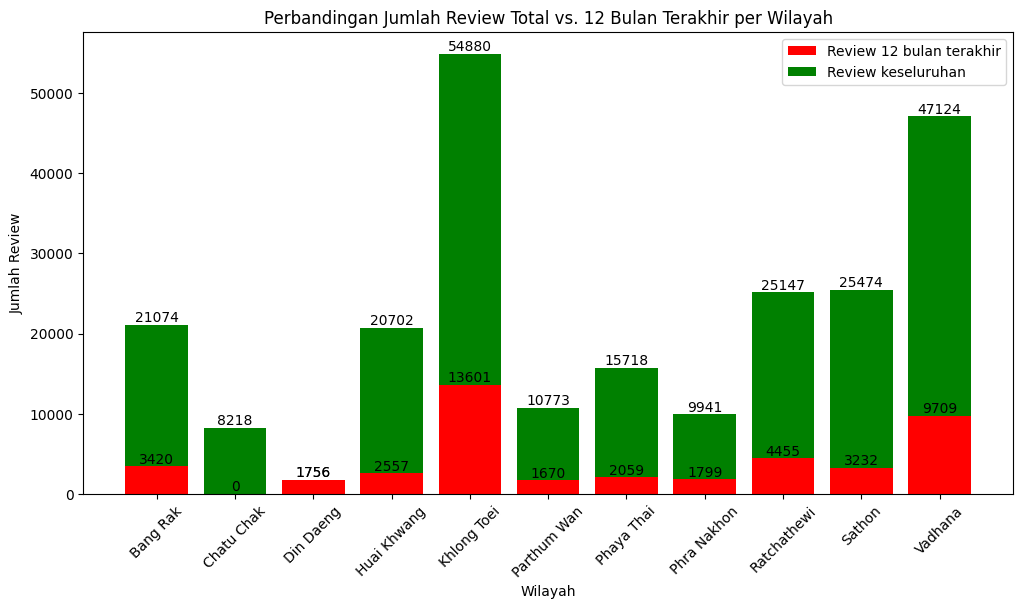

In [27]:
# top review Vs top review 12 bulan terakhir
TopWilayah_Review = TopWilayah_Review.reset_index(drop=True)
TopWilayah_Review.index = TopWilayah_Review.index + 1
TopWilayah_Review12 = TopWilayah_Review12.reset_index(drop=True)
TopWilayah_Review12.index = TopWilayah_Review12.index + 1
combined_data = pd.merge(TopWilayah_Review, TopWilayah_Review12, on='neighbourhood', how='outer').fillna(0)


plt.figure(figsize=(12, 6))
bar1 = plt.bar(combined_data['neighbourhood'], combined_data['number_of_reviews_ltm'], label='Review 12 bulan terakhir', color='red')
bar2 = plt.bar(combined_data['neighbourhood'], combined_data['number_of_reviews'], 
        bottom=combined_data['number_of_reviews_ltm'], label='Review keseluruhan', color='green')
plt.title('Perbandingan Jumlah Review Total vs. 12 Bulan Terakhir per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Review')
plt.xticks(combined_data['neighbourhood'], rotation=45)
plt.legend()
# Menambahkan label untuk review 12 bulan terakhir
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10)

# Menambahkan label untuk review total (di atas bar kedua)
for bar, review_ltm in zip(bar2, combined_data['number_of_reviews_ltm']):
    yval = bar.get_height() + review_ltm
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.show()

Dari hasil perbandingan top 10 Review keseluruhan dan juga top 10 Review 12 bulan terakhir bisa kita lihat :
- Terdapat 9 wilayah yang sama dan keduanya sama-sama memiliki 1 wilayah yang berbeda.
- Bang Rak, Huai Khwang, Khlong Tei, Parthum Wan, Phaya Thai, Phra Nakhon, Ratchathewi, Sathon dan Vadhana terdapat pada kedua kategori. 
- Chatu Chak hanya terdapat dalam top 10 Review keseluruhan. 
- Dalam 12 bulan terakhir wilayah Din Daeng lebih banyak di pilih tamu(guest).

Setelah melihat barplot diatas, saya melakukan riset di google dan menemukan bahwa 11 wilayah yang paling banyak di pilih oleh tamu(guest) merupakan wilayah-wilayah dengan banyak objek wisata, pusat perbelanjaan, tempat yang memiliki banyak pilihan kuliner dan terkenal dengan marketnya yang menjual berbagai macam barang mulai dari makanan, hiasan, oleh-oleh dan lain-lain.(sumber : google(berbagai link yang mendukung cukup banyak), https://www.tripadvisor.co.id/ (salah satu source yang menampilkan objek wisata paling populer di 11 wilayah yang paling banyak di pilih))
Selain itu 11 wilayah yang paling banyak di pilih oleh tamu(guest) terletak cukup dekat dari pusat kota bangkok, sehingga hal tersebut juga menjadi faktor tamu(guest) memilih wilayah-wilayah tersebut. (sumber : google maps)

#### tipe ruangan apa yang paling banyak dipilih tamu(guest) dari wilayah yang paling banyak dipilih tamu(guest)?

In [28]:
# menampilkan jumlah tipe ruangan yang banyak di pilih oleh top 10 wilayah yang banyak di review
tipe_data = pd.merge(TopWilayah_Review, df[['neighbourhood', 'room_type', 'id']], on='neighbourhood', how='left')
tipe = tipe_data.groupby(['neighbourhood', 'room_type']).count()[['id']].reset_index()
tipe.rename(columns={'id': 'jumlah'}, inplace=True)
tipe

,neighbourhood,room_type,jumlah
0,Bang Rak,Entire home/apt,351
1,Bang Rak,Hotel room,67
2,Bang Rak,Private room,375
3,Bang Rak,Shared room,34
4,Chatu Chak,Entire home/apt,273
5,Chatu Chak,Hotel room,2
6,Chatu Chak,Private room,266
7,Chatu Chak,Shared room,7
8,Huai Khwang,Entire home/apt,776
9,Huai Khwang,Hotel room,25


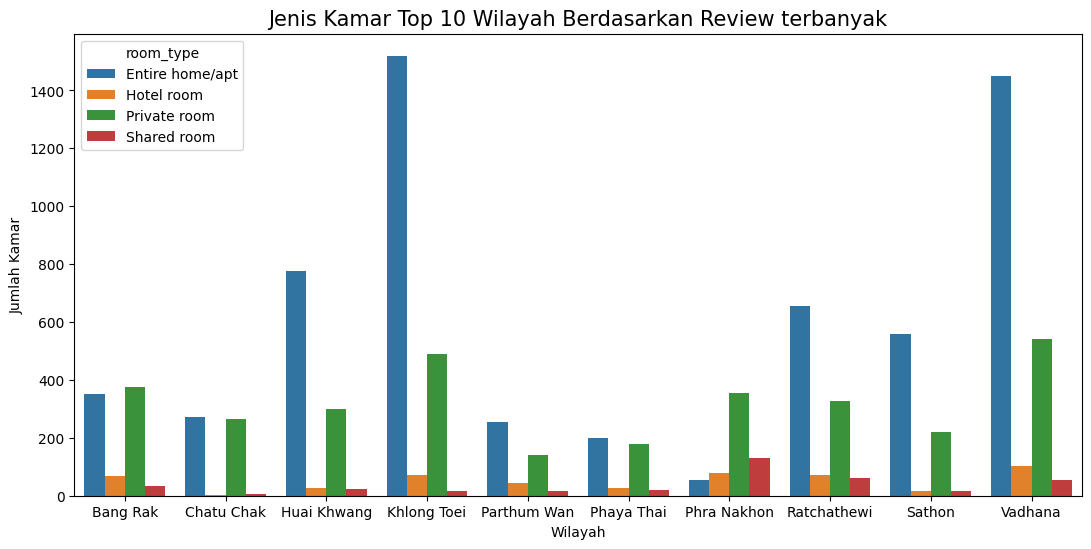

In [29]:
plt.figure(figsize=(13,6))
sns.barplot(data=tipe, x = 'neighbourhood', y = 'jumlah', hue = 'room_type')
plt.title('Jenis Kamar Top 10 Wilayah Berdasarkan Review terbanyak', size = 15)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kamar')
plt.show()

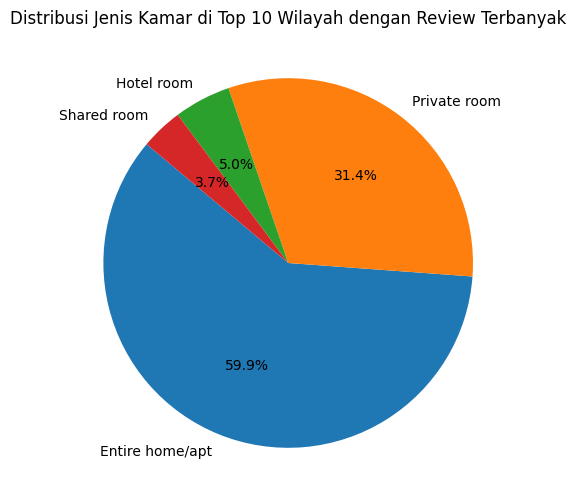

In [72]:
merged_data = pd.merge(TopWilayah_Review, df[['neighbourhood', 'room_type']], on='neighbourhood', how='left')

# Menghitung jumlah jenis kamar di TopWilayah_Review
roomTypeCount = merged_data['room_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(roomTypeCount, labels=roomTypeCount.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jenis Kamar di Top 10 Wilayah dengan Review Terbanyak')
plt.show()

Jika di lihat dari barplot Jenis Kamar Top 10 Wilayah Berdasarkan Review terbanyak, Entire home/apt merupakan jenis yang paling banyak di pilih di 8 wilayah sedangkan 2 wilayah lainnya lebih banyak memilih private room. Kemudian jika kita melihat dari pie chart diatas, meskipun pada barplot 2 wilayah lebih memilih private room, tapi secara kesuluruhan entire home/apt merupakan jenis tipe kamar yang paling banyak di pilih dengan nilai 59.9%. Dari pie chart diatas juga bisa kita lihat untuk tipe kamar Shared Room peminatnya cukup sedikit dengan nilai 3.7%.

#### tipe ruangan apa yang paling banyak dipilih tamu(guest) dari wilayah yang paling banyak dipilih tamu(guest) selama 12 bulan terakhir?

In [31]:
# menampilkan jumlah tipe ruangan yang banyak di pilih oleh top 10 wilayah yang banyak di review 12 bulan terakhir
tipe_data12 = pd.merge(TopWilayah_Review12, df[['neighbourhood', 'room_type', 'id']], on='neighbourhood', how='left')
tipe12 = tipe_data12.groupby(['neighbourhood', 'room_type']).count()[['id']].reset_index()
tipe12.rename(columns={'id': 'jumlah'}, inplace=True)
tipe12

,neighbourhood,room_type,jumlah
0,Bang Rak,Entire home/apt,351
1,Bang Rak,Hotel room,67
2,Bang Rak,Private room,375
3,Bang Rak,Shared room,34
4,Din Daeng,Entire home/apt,219
5,Din Daeng,Hotel room,15
6,Din Daeng,Private room,189
7,Din Daeng,Shared room,20
8,Huai Khwang,Entire home/apt,776
9,Huai Khwang,Hotel room,25


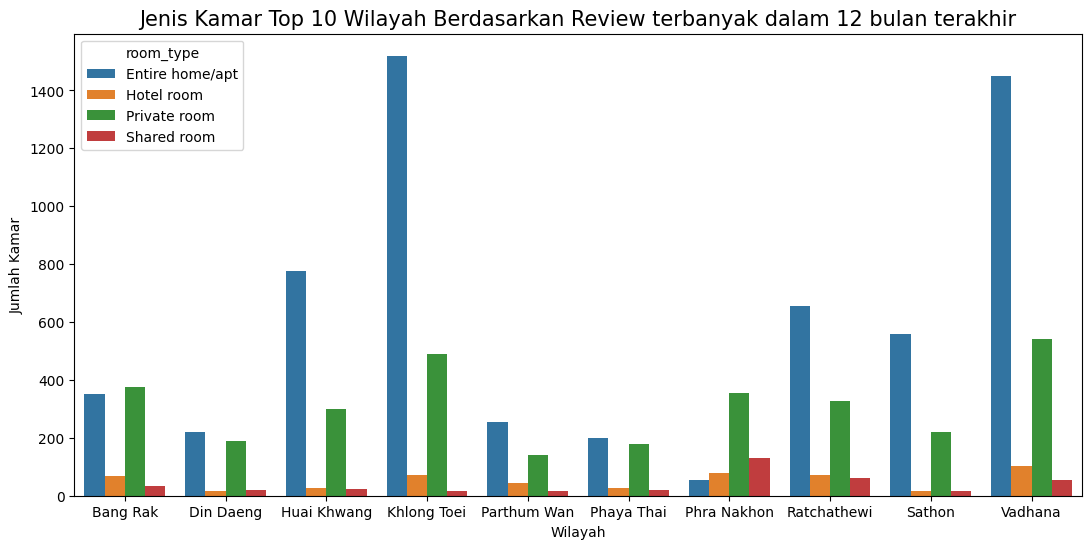

In [32]:
plt.figure(figsize=(13,6))
sns.barplot(data=tipe12, x = 'neighbourhood', y = 'jumlah', hue = 'room_type')
plt.title('Jenis Kamar Top 10 Wilayah Berdasarkan Review terbanyak dalam 12 bulan terakhir', size = 15)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kamar')
plt.show()

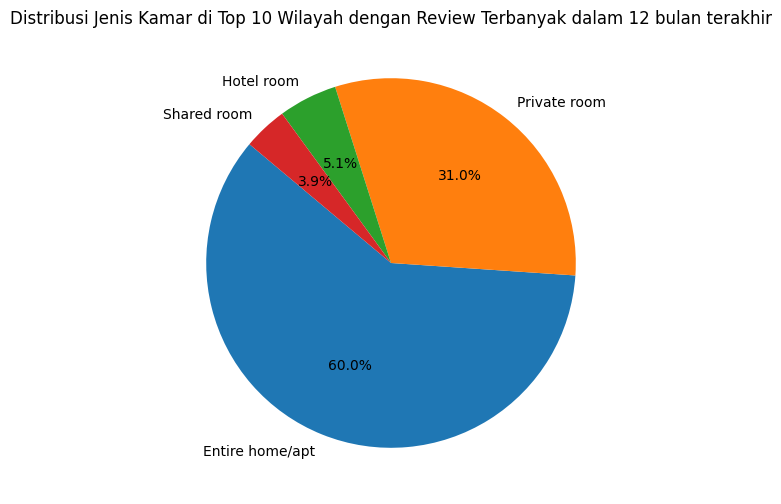

In [71]:
merged_data12 = pd.merge(TopWilayah_Review12, df[['neighbourhood', 'room_type']], on='neighbourhood', how='left')

# Menghitung jumlah jenis kamar di TopWilayah_Review12
roomTypeCount12 = merged_data12['room_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(roomTypeCount12, labels=roomTypeCount12.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jenis Kamar di Top 10 Wilayah dengan Review Terbanyak dalam 12 bulan terakhir')
plt.show()

Jika di lihat dari barplot Jenis Kamar Top 10 Wilayah Berdasarkan Review terbanyak dalam 12 bulan terakhir, Entire home/apt merupakan jenis yang paling banyak di pilih di 8 wilayah sedangkan 2 wilayah lainnya lebih banyak memilih private room. Kemudian jika kita melihat dari pie chart diatas, meskipun pada barplot 2 wilayah lebih memilih private room, tapi secara kesuluruhan entire home/apt merupakan jenis tipe kamar yang paling banyak di pilih dengan nilai 60.0%. Dari pie chart diatas juga bisa kita lihat untuk tipe kamar Shared Room peminatnya cukup sedikit dengan nilai 3.9%.

#### wilayah mana yang paling sedikit memiliki tamu(guest) berdasarkan review?

In [34]:
# wilayah mana yang paling sedikit memiliki tamu(guest) berdasarkan review
Wilayah_Review = df.groupby('neighbourhood')[['number_of_reviews']].sum()
Wilayah_LowReview = Wilayah_Review.sort_values(by='number_of_reviews', ascending=True).reset_index().head(10)
Wilayah_LowReview

,neighbourhood,number_of_reviews
0,Bang Bon,1
1,Nong Khaem,1
2,Nong Chok,4
3,Thawi Watthana,11
4,Sai Mai,22
5,Thung khru,22
6,Khlong Sam Wa,42
7,Taling Chan,45
8,Bang Khun thain,102
9,Saphan Sung,133


#### wilayah mana yang memiliki review paling sedikit dalam 12 bulan terakhir?

In [35]:
# wilayah mana yang memiliki review paling sedikit dalam 12 bulan terakhir
Wilayah_Review12 = df.groupby('neighbourhood')[['number_of_reviews_ltm']].sum()
Wilayah_LowReview12 = Wilayah_Review12.sort_values('number_of_reviews_ltm', ascending=True).reset_index().head(10)
Wilayah_LowReview12

,neighbourhood,number_of_reviews_ltm
0,Bang Bon,0
1,Nong Khaem,0
2,Nong Chok,0
3,Thung khru,0
4,Thawi Watthana,1
5,Sai Mai,4
6,Taling Chan,7
7,Saphan Sung,14
8,Khlong Sam Wa,18
9,Bueng Kum,25


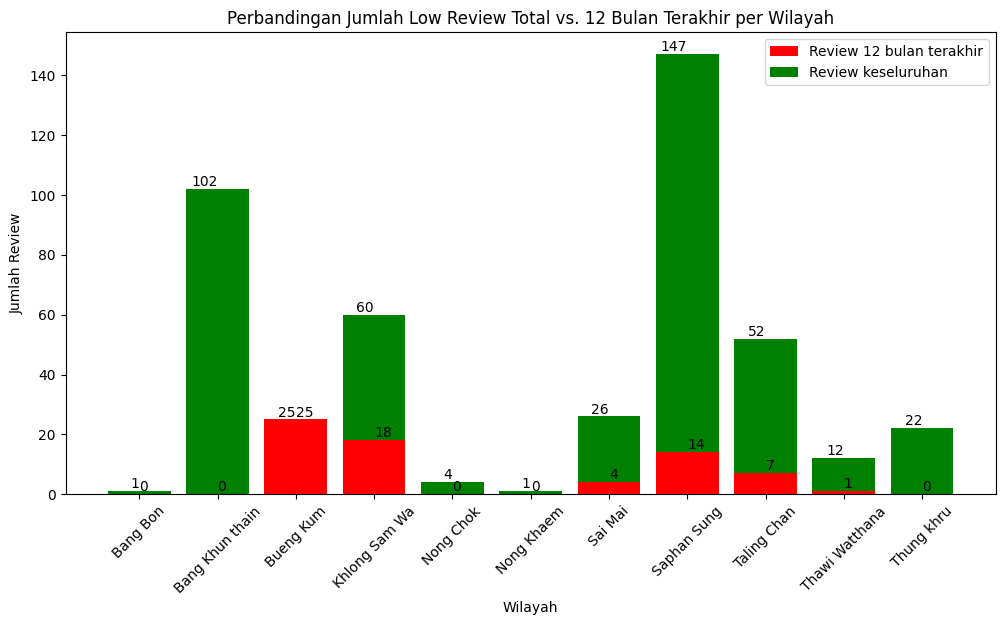

In [36]:
# low review Vs low review 12 bulan terakhir
Wilayah_LowReview = Wilayah_LowReview.reset_index(drop=True)
Wilayah_LowReview.index = Wilayah_LowReview.index + 1
Wilayah_LowReview12 = Wilayah_LowReview12.reset_index(drop=True)
Wilayah_LowReview12.index = Wilayah_LowReview12.index + 1
combined_data = pd.merge(Wilayah_LowReview, Wilayah_LowReview12, on='neighbourhood', how='outer').fillna(0)


plt.figure(figsize=(12, 6))
barl1 = plt.bar(combined_data['neighbourhood'], combined_data['number_of_reviews_ltm'], label='Review 12 bulan terakhir', color='red')
barl2 = plt.bar(combined_data['neighbourhood'], combined_data['number_of_reviews'], 
        bottom=combined_data['number_of_reviews_ltm'], label='Review keseluruhan', color='green')
plt.title('Perbandingan Jumlah Low Review Total vs. 12 Bulan Terakhir per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Review')
plt.xticks(combined_data['neighbourhood'], rotation=45)
plt.legend()
# Menambahkan label untuk review 12 bulan terakhir
for bar in barl1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='left', fontsize=10)

# Menambahkan label untuk review total (di atas bar kedua)
for bar, review_ltm in zip(barl2, combined_data['number_of_reviews_ltm']):
    yval = bar.get_height() + review_ltm
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='right', fontsize=10)

plt.show()

Dari hasil perbandingan 10 Low Review keseluruhan dan juga 10 Low Review 12 bulan terakhir bisa kita lihat :
- Terdapat 9 wilayah yang sama dan keduanya sama-sama memiliki 1 wilayah yang berbeda.
- Bang Bon, Khlong Sam Wa, Nong Chok, Nong Khaem, Sai Mai, Saphan Sung, Taling Chan, Thawi Watthana, dan Thung Khru terdapat pada kedua kategori. 
- Bang Khun thain hanya terdapat dalam 10 Low Review keseluruhan. 
- Dalam 12 bulan terakhir wilayah Bueng Kum lebih sedikit di pilih tamu(guest).

Setelah melihat barplot diatas, saya melakukan riset di google dan menemukan bahwa 11 wilayah yang paling sedikit di pilih oleh tamu(guest) terletak cukup jauh dari pusat kota bangkok, sehingga hal tersebut juga menjadi faktor tamu(guest) tidak terlalu banyak memilih wilayah-wilayah tersebut. (sumber : google maps)

#### tipe ruangan apa yang paling banyak dipilih tamu(guest) dari wilayah yang paling sedikit dipilih tamu(guest)?

In [37]:
# menampilkan jumlah tipe ruangan yang banyak di pilih oleh 10 wilayah yang sedikit di review
tipe_dataLow = pd.merge(Wilayah_LowReview, df[['neighbourhood', 'room_type', 'id']], on='neighbourhood', how='left')
tipeLow = tipe_dataLow.groupby(['neighbourhood', 'room_type']).count()[['id']].reset_index()
tipeLow.rename(columns={'id': 'jumlah'}, inplace=True)
tipeLow

,neighbourhood,room_type,jumlah
0,Bang Bon,Entire home/apt,2
1,Bang Bon,Private room,3
2,Bang Khun thain,Entire home/apt,7
3,Bang Khun thain,Private room,12
4,Bang Khun thain,Shared room,2
5,Khlong Sam Wa,Entire home/apt,20
6,Khlong Sam Wa,Private room,12
7,Nong Chok,Entire home/apt,8
8,Nong Chok,Private room,6
9,Nong Khaem,Entire home/apt,2


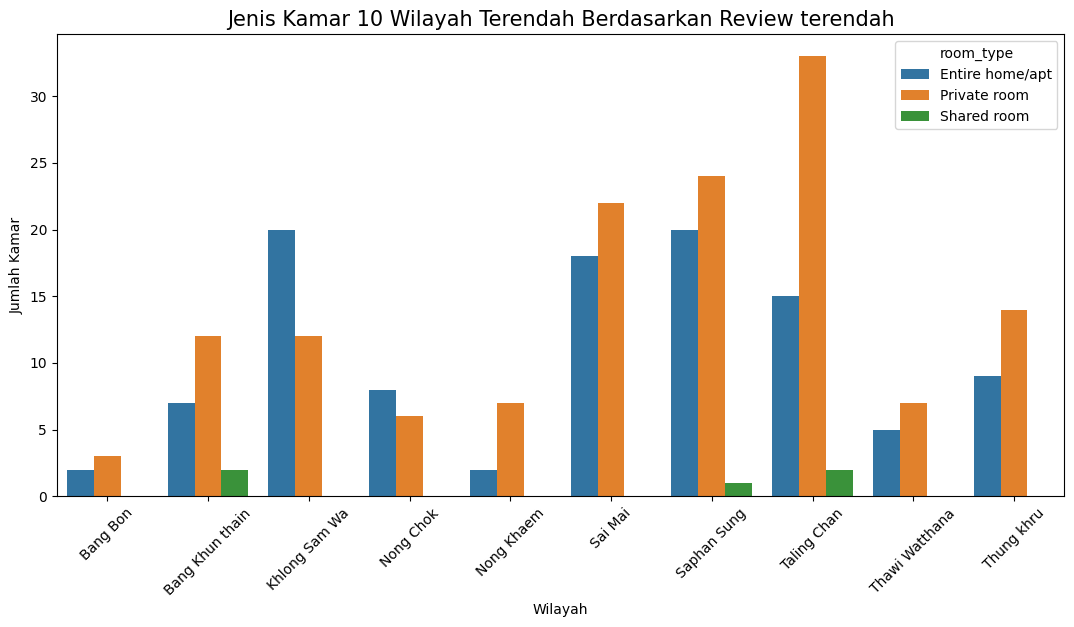

In [85]:
plt.figure(figsize=(13,6))
sns.barplot(data=tipeLow, x = 'neighbourhood', y = 'jumlah', hue = 'room_type')
plt.title('Jenis Kamar 10 Wilayah Terendah Berdasarkan Review terendah', size = 15)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kamar')
plt.xticks(rotation=45)
plt.show()

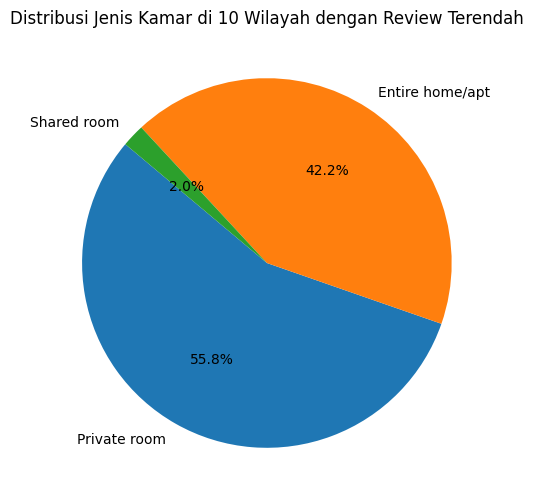

In [70]:
merged_dataLow = pd.merge(Wilayah_LowReview, df[['neighbourhood', 'room_type']], on='neighbourhood', how='left')

# Menghitung jumlah jenis kamar di Wilayah_LowReview
roomTypeLowCount = merged_dataLow['room_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(roomTypeLowCount, labels=roomTypeLowCount.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jenis Kamar di 10 Wilayah dengan Review Terendah')
plt.show()

Jika di lihat dari barplot Jenis Kamar 10 Wilayah Berdasarkan Review Terendah, Private room merupakan jenis yang paling banyak di pilih di 8 wilayah sedangkan 2 wilayah lainnya lebih banyak memilih Entire home/apt. Kemudian jika kita melihat dari pie chart diatas, meskipun pada barplot 2 wilayah lebih memilih Entire home/apt, tapi secara kesuluruhan Private room merupakan jenis tipe kamar yang paling banyak di pilih dengan nilai 55.8%. Dari pie chart diatas juga bisa kita lihat untuk tipe kamar Hotel Room tidak ada, yang berarti tipe kamar Hotel Room bernilai 0% karena tidak di pilih sama sekali oleh tamu(guest).

#### tipe ruangan apa yang paling banyak dipilih tamu(guest) dari wilayah yang paling sedikit dipilih tamu(guest) selama 12 bulan terakhir?

In [40]:
# menampilkan jumlah tipe ruangan yang banyak di pilih oleh 10 wilayah yang sedikit di review 12 bulan terakhir
tipe_dataLow12 = pd.merge(Wilayah_LowReview12, df[['neighbourhood', 'room_type', 'id']], on='neighbourhood', how='left')
tipeLow12 = tipe_dataLow12.groupby(['neighbourhood', 'room_type']).count()[['id']].reset_index()
tipeLow12.rename(columns={'id': 'jumlah'}, inplace=True)
tipeLow12

,neighbourhood,room_type,jumlah
0,Bang Bon,Entire home/apt,2
1,Bang Bon,Private room,3
2,Bueng Kum,Entire home/apt,32
3,Bueng Kum,Private room,22
4,Khlong Sam Wa,Entire home/apt,20
5,Khlong Sam Wa,Private room,12
6,Nong Chok,Entire home/apt,8
7,Nong Chok,Private room,6
8,Nong Khaem,Entire home/apt,2
9,Nong Khaem,Private room,7


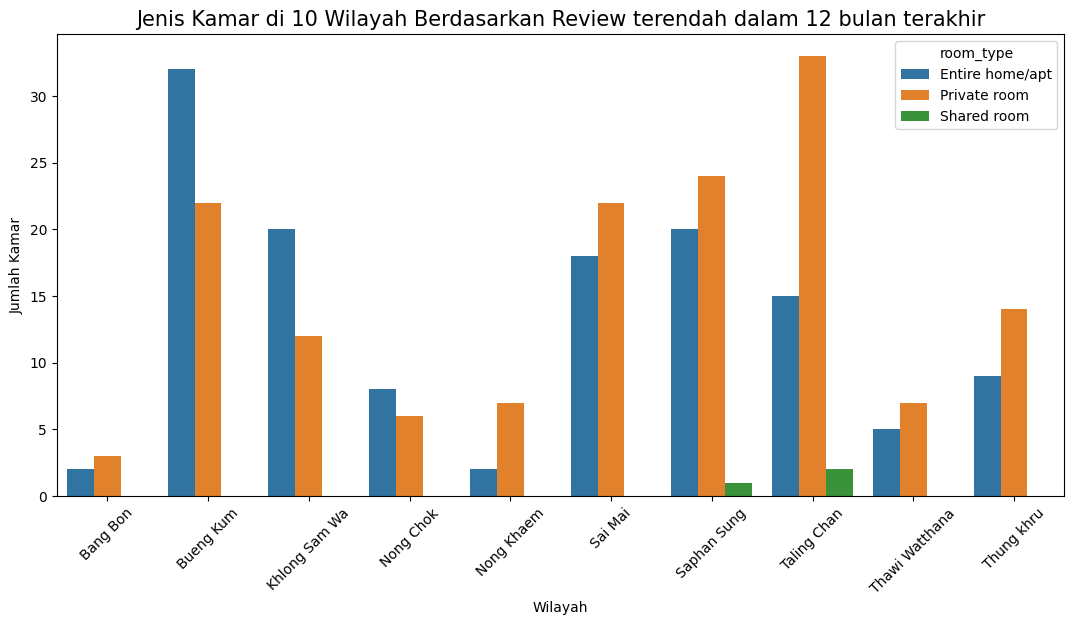

In [84]:
plt.figure(figsize=(13,6))
sns.barplot(data=tipeLow12, x = 'neighbourhood', y = 'jumlah', hue = 'room_type')
plt.title('Jenis Kamar di 10 Wilayah Berdasarkan Review terendah dalam 12 bulan terakhir', size = 15)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kamar')
plt.xticks(rotation=45)
plt.show()

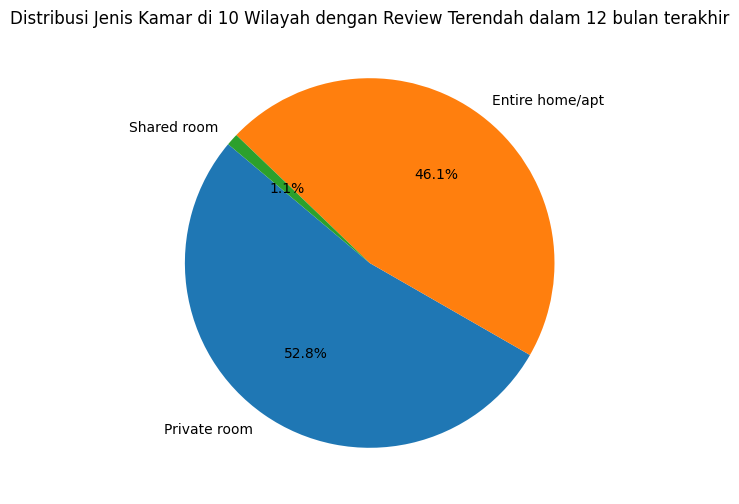

In [69]:
merged_dataLow12 = pd.merge(Wilayah_LowReview12, df[['neighbourhood', 'room_type']], on='neighbourhood', how='left')

# Menghitung jumlah jenis kamar di Wilayah_LowReview12
roomTypeLowCount12 = merged_dataLow12['room_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(roomTypeLowCount12, labels=roomTypeLowCount12.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jenis Kamar di 10 Wilayah dengan Review Terendah dalam 12 bulan terakhir')
plt.show()

Jika di lihat dari barplot Jenis Kamar 10 Wilayah Berdasarkan Review Terendah 12 bulan terakhir, Private room merupakan jenis yang paling banyak di pilih di 7 wilayah sedangkan 3 wilayah lainnya lebih banyak memilih Entire home/apt. Kemudian jika kita melihat dari pie chart diatas, meskipun pada barplot 3 wilayah lebih memilih Entire home/apt, tapi secara kesuluruhan Private room merupakan jenis tipe kamar yang paling banyak di pilih dengan nilai 52.8%. Dari pie chart diatas juga bisa kita lihat untuk tipe kamar Hotel Room tidak ada, yang berarti tipe kamar Hotel Room bernilai 0% karena tidak di pilih sama sekali oleh tamu(guest).

#### apakah harga berpengaruh pada pemilihan tipe ruangan?

In [43]:
ap, pval = normaltest(df['price'])
if pval > 0.05:
    print('Asumsi : kita tidak memiliki cukup bukti untuk menolak H0 sehingga asumsi distribusi cenderung normal (terima H0)')
else:
    print('Asumsi : kita memiliki cukup bukti untuk menolak H0 sehingga asumsi distribusi cenderung tidak normal (Tolak H0)')

Asumsi : kita memiliki cukup bukti untuk menolak H0 sehingga asumsi distribusi cenderung tidak normal (Tolak H0)


Dari pengecekan outliers sebelumnya serta dari pengujian statistik diatas, bisa kita ketahui bahwa kolom price terdistribusi tidak normal. Sehingga kita bisa menggunakan metode spearman untuk mengetes korelasinya terhadap kolom-kolom lain. Kita juga bisa menggunakan median untuk membuat analisis.

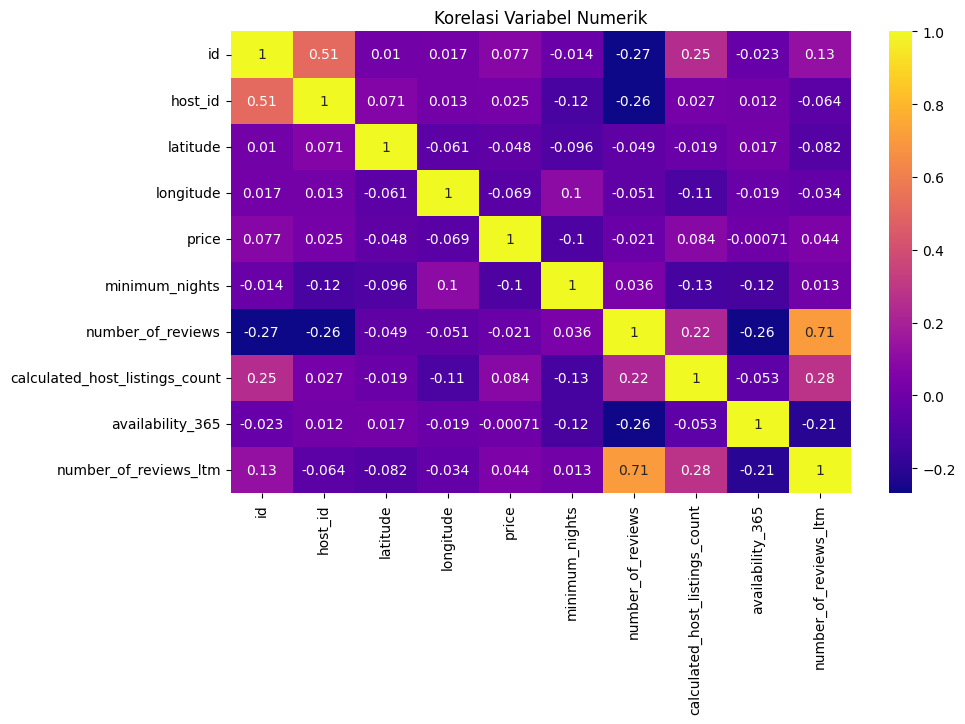

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(method='spearman',numeric_only=True), cmap='plasma', annot=True)
plt.title('Korelasi Variabel Numerik')
plt.show()

Dari visualisasi data diatas yang menggunakan heatmap, dapat kita ketahui bahwa :
- Korelasi Price dengan number_of_reviews adalah -0.021 yang berarti price dan number_of_reviews tidak memiliki korelasi
- Korelasi Price dengan number_of_reviews_ltm adalah 0.044 yang berarti price dan number_of_reviews_ltm tidak memiliki korelasi
- Korelasi number_of_reviews dan number_of_reviews_ltm adalah 0.71 yang berarti number_of_reviews dan number_of_reviews_ltm memiliki korelasi kuat dan cenderung positif

##### Analisis Harga jenis kamar pada 10 wilayah dengan review terbanyak dan terendah

In [93]:
AllPriceTopReview = pd.merge(tipe,df[['neighbourhood', 'room_type','price']],on=['neighbourhood','room_type'], how='left')
PriceTopReview = AllPriceTopReview.groupby(['neighbourhood','room_type'])[['price']].median()
PriceTopReview

price
neighbourhood room_type              
Bang Rak      Entire home/apt  2228.0
              Hotel room       1690.0
              Private room     1757.0
              Shared room       400.0
Chatu Chak    Entire home/apt  1100.0
              Hotel room       4944.5
              Private room     1101.5
              Shared room       829.0
Huai Khwang   Entire home/apt  1375.0
              Hotel room       2599.0
              Private room     1290.0
              Shared room       350.0
Khlong Toei   Entire home/apt  1732.0
              Hotel room       1816.0
              Private room     1498.5
              Shared room       560.0
Parthum Wan   Entire home/apt  2590.0
              Hotel room       3000.0
              Private room     2000.0
              Shared room       500.0
Phaya Thai    Entire home/apt  1511.5
              Hotel room        850.0
              Private room     1400.0
              Shared room       650.0
Phra Nakhon   Entire home/apt  2331.0
              Hotel room       1349.0
              Private room     1350.0
              Shared room       550.0
Ratchathewi   Entire home/apt  1649.5
              Hotel room       1504.5
              Private room     1434.5
              Shared room       470.0
Sathon        Entire home/apt  1400.0
              Hotel room       2500.0
              Private room     1200.0
              Shared room       490.0
Vadhana       Entire home/apt  2100.0
              Hotel room       2440.5
              Private room     1796.5
              Shared room       565.0

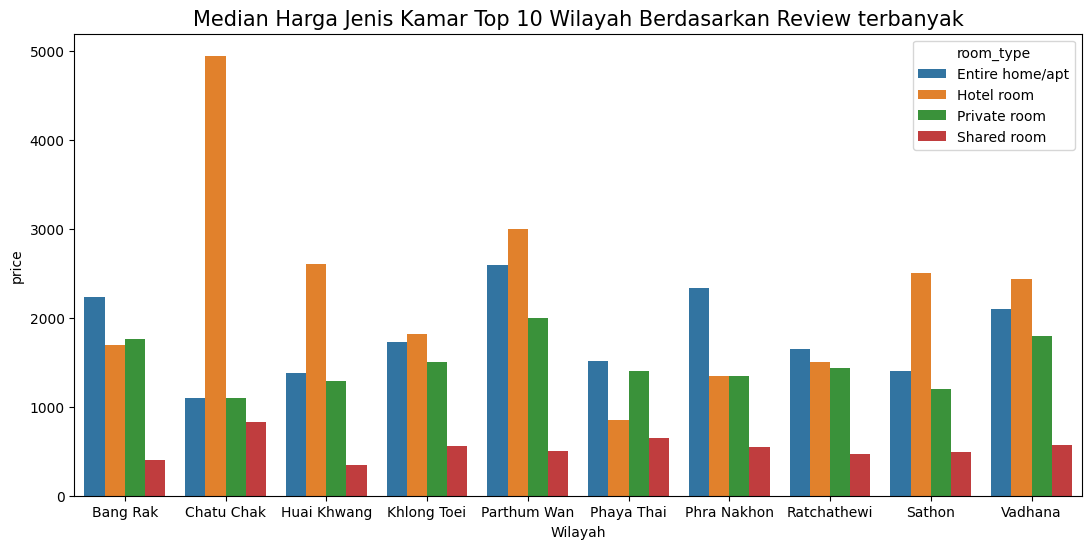

In [74]:
plt.figure(figsize=(13,6))
sns.barplot(data=PriceTopReview, x = 'neighbourhood', y = 'price', hue = 'room_type')
plt.title('Median Harga Jenis Kamar Top 10 Wilayah Berdasarkan Review terbanyak', size = 15)
plt.xlabel('Wilayah')
plt.ylabel('price')
plt.show()

In [79]:
AllPriceLowReview = pd.merge(tipeLow,df[['neighbourhood', 'room_type','price']],on=['neighbourhood','room_type'], how='left')
PriceLowReview = AllPriceLowReview.groupby(['neighbourhood','room_type'])[['price']].median()
PriceLowReview

price
neighbourhood   room_type              
Bang Bon        Entire home/apt  1600.0
                Private room      900.0
Bang Khun thain Entire home/apt  2057.0
                Private room      999.5
                Shared room      7276.0
Khlong Sam Wa   Entire home/apt  1750.0
                Private room      922.0
Nong Chok       Entire home/apt  3831.5
                Private room      822.5
Nong Khaem      Entire home/apt  3160.5
                Private room      501.0
Sai Mai         Entire home/apt  2650.0
                Private room      570.0
Saphan Sung     Entire home/apt  2199.0
                Private room      790.0
                Shared room       313.0
Taling Chan     Entire home/apt  2500.0
                Private room     1381.0
                Shared room       775.0
Thawi Watthana  Entire home/apt   800.0
                Private room     1600.0
Thung khru      Entire home/apt  1057.0
                Private room      700.0

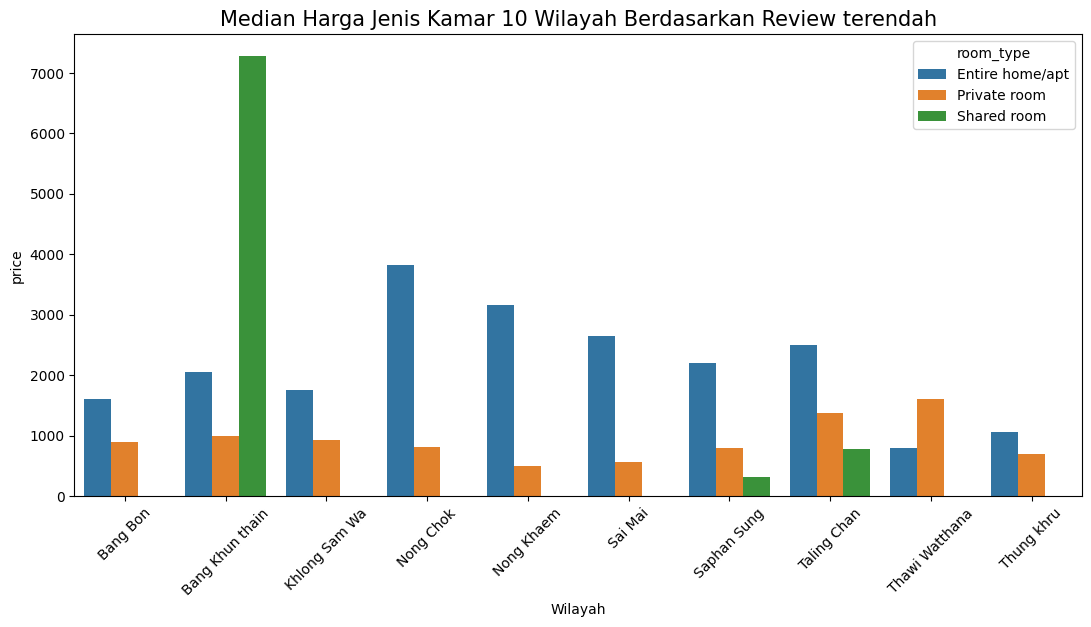

In [83]:
plt.figure(figsize=(13,6))
sns.barplot(data=PriceLowReview, x = 'neighbourhood', y = 'price', hue = 'room_type')
plt.title('Median Harga Jenis Kamar 10 Wilayah Berdasarkan Review terendah', size = 15)
plt.xlabel('Wilayah')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

Berdasarkan barplot dari Median harga 10 jenis kamar wilayah dengan review terbanyak serta jenis kamar 10 wilayah dengan review terendah diatas bisa kita lihat bahwa :
- pada 10 wilayah dengan review terbanyak, jika dilihat harga jenis kamar Hotel Room cukup tinggi terutama di daerah chatu chak, sehingga tidak terlalu banyak tamu(guest) yang memilih jenis kamar tersebut. Kemudian bisa di lihat Jenis Kamar Entire home/apt merupakan jenis kamar dengan harga tertinggi kedua, namun jenis kamar entire home/apt merupakan jenis kamar yang paling banyak di pilih oleh tamu(guest). Sedangkan bisa di lihat meskipun shared room jauh lebih murah dibandingkan yang lain, tapi shared room tidak banyak di pilih oleh tamu(guest). sehingga saya menyimpulkan **harga memiliki pengaruh pada pemilihan jenis kamar, meskipun tidak terlalu besar**
- pada 10 wilayah dengan review terendah, jika dilihat harga jenis kamar private room lebih murah di bandingkan jenis kamar lainnya sehingga jenis kamar private room banyak dipilih oleh tamu(guest), meskipun di daerah khlong Sam Wa dan juga Nong Chok tamu(guest) lebih banyak memilih jenis kamar entire home/apt yang memiliki harga cukup tinggi. Harga yang tinggi pada jenis ruangan Shared Room juga membuat tamu(guest) tidak terlalu banyak memilih jenis kamar tersebut, meskipun bisa dilihat harga jenis kamar Shared room cukup murah di Saphan Sung dan Taling Chan tapi tidak banyak tamu(guest) yang memilih jenis kamar tersebut. sehingga saya menyimpulkan **harga memiliki pengaruh pada pemilihan jenis kamar, meskipun tidak terlalu besar**

##### Analisis Harga jenis kamar pada 10 wilayah dengan review terbanyak dan terendah dalam 12 bulan terakhir

In [94]:
AllPriceTopReview12 = pd.merge(tipe12,df[['neighbourhood', 'room_type','price']],on=['neighbourhood','room_type'], how='left')
PriceTopReview12 = AllPriceTopReview12.groupby(['neighbourhood','room_type'])[['price']].median()
PriceTopReview12

price
neighbourhood room_type              
Bang Rak      Entire home/apt  2228.0
              Hotel room       1690.0
              Private room     1757.0
              Shared room       400.0
Din Daeng     Entire home/apt  1347.0
              Hotel room       1000.0
              Private room     1000.0
              Shared room       390.0
Huai Khwang   Entire home/apt  1375.0
              Hotel room       2599.0
              Private room     1290.0
              Shared room       350.0
Khlong Toei   Entire home/apt  1732.0
              Hotel room       1816.0
              Private room     1498.5
              Shared room       560.0
Parthum Wan   Entire home/apt  2590.0
              Hotel room       3000.0
              Private room     2000.0
              Shared room       500.0
Phaya Thai    Entire home/apt  1511.5
              Hotel room        850.0
              Private room     1400.0
              Shared room       650.0
Phra Nakhon   Entire home/apt  2331.0
              Hotel room       1349.0
              Private room     1350.0
              Shared room       550.0
Ratchathewi   Entire home/apt  1649.5
              Hotel room       1504.5
              Private room     1434.5
              Shared room       470.0
Sathon        Entire home/apt  1400.0
              Hotel room       2500.0
              Private room     1200.0
              Shared room       490.0
Vadhana       Entire home/apt  2100.0
              Hotel room       2440.5
              Private room     1796.5
              Shared room       565.0

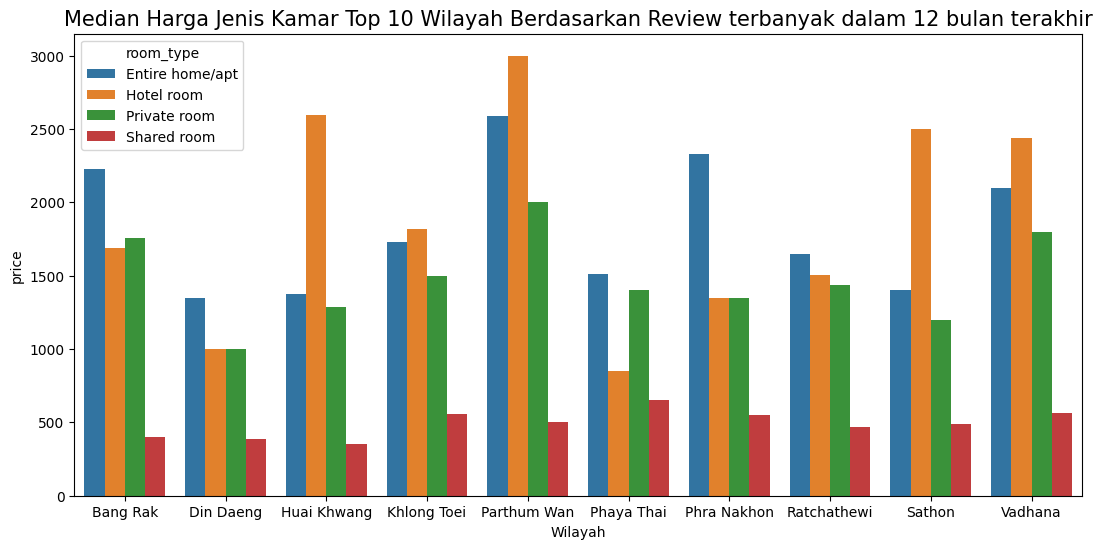

In [95]:
plt.figure(figsize=(13,6))
sns.barplot(data=PriceTopReview12, x = 'neighbourhood', y = 'price', hue = 'room_type')
plt.title('Median Harga Jenis Kamar Top 10 Wilayah Berdasarkan Review terbanyak dalam 12 bulan terakhir', size = 15)
plt.xlabel('Wilayah')
plt.ylabel('price')
plt.show()

In [96]:
AllPriceLowReview12 = pd.merge(tipeLow12,df[['neighbourhood', 'room_type','price']],on=['neighbourhood','room_type'], how='left')
PriceLowReview12 = AllPriceLowReview12.groupby(['neighbourhood','room_type'])[['price']].median()
PriceLowReview12

price
neighbourhood  room_type              
Bang Bon       Entire home/apt  1600.0
               Private room      900.0
Bueng Kum      Entire home/apt  1085.0
               Private room     1119.5
Khlong Sam Wa  Entire home/apt  1750.0
               Private room      922.0
Nong Chok      Entire home/apt  3831.5
               Private room      822.5
Nong Khaem     Entire home/apt  3160.5
               Private room      501.0
Sai Mai        Entire home/apt  2650.0
               Private room      570.0
Saphan Sung    Entire home/apt  2199.0
               Private room      790.0
               Shared room       313.0
Taling Chan    Entire home/apt  2500.0
               Private room     1381.0
               Shared room       775.0
Thawi Watthana Entire home/apt   800.0
               Private room     1600.0
Thung khru     Entire home/apt  1057.0
               Private room      700.0

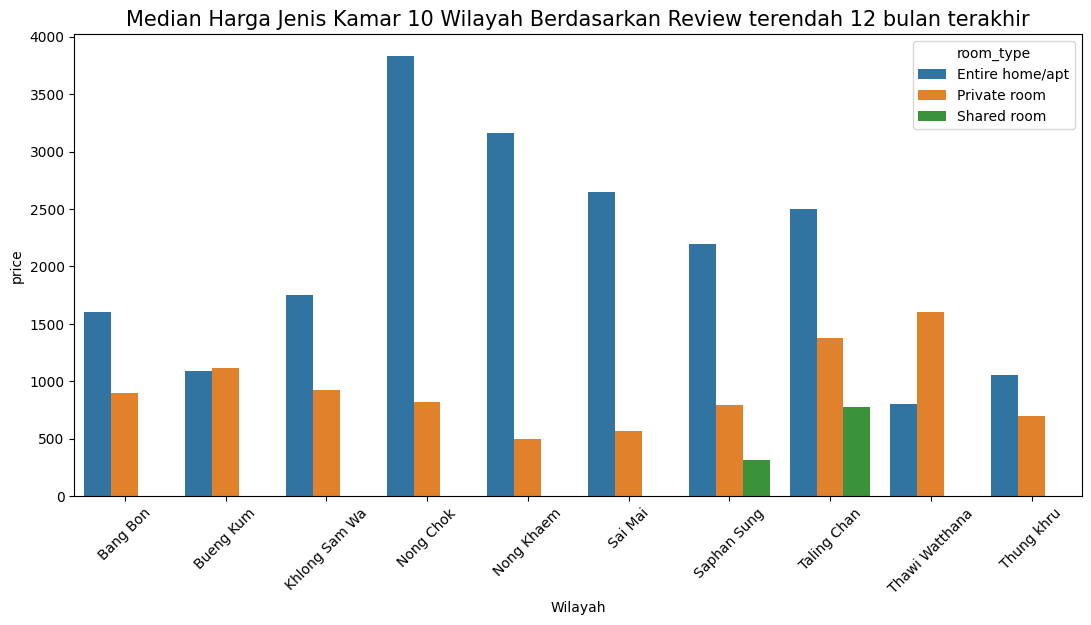

In [97]:
plt.figure(figsize=(13,6))
sns.barplot(data=PriceLowReview12, x = 'neighbourhood', y = 'price', hue = 'room_type')
plt.title('Median Harga Jenis Kamar 10 Wilayah Berdasarkan Review terendah 12 bulan terakhir', size = 15)
plt.xlabel('Wilayah')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

Berdasarkan barplot dari Median harga 10 jenis kamar wilayah dengan review terbanyak serta jenis kamar 10 wilayah dengan review terendah 12 bulan terakhir diatas bisa kita lihat bahwa :
- pada 10 wilayah dengan review terbanyak 12 bulan terakhir, jika dilihat harga jenis kamar Hotel Room cukup tinggi terutama di daerah Parthum Wan, sehingga tidak terlalu banyak tamu(guest) yang memilih jenis kamar tersebut. Kemudian bisa di lihat Jenis Kamar Entire home/apt merupakan jenis kamar dengan harga tertinggi kedua, namun jenis kamar entire home/apt merupakan jenis kamar yang paling banyak di pilih oleh tamu(guest). Sedangkan bisa di lihat meskipun shared room jauh lebih murah dibandingkan yang lain, tapi shared room tidak banyak di pilih oleh tamu(guest). sehingga saya menyimpulkan **harga memiliki pengaruh pada pemilihan jenis kamar, meskipun tidak terlalu besar**
- pada 10 wilayah dengan review terendah 12 bulan terakhir, jika dilihat harga jenis kamar private room yang cukup murah di bandingkan jenis kamar lain sehingga jenis kamar private room banyak dipilih oleh tamu(guest) di sebagian wilayah, namun di sebagian wilayah, tamu(guest) lebih banyak memilih jenis kamar entire home/apt yang memiliki harga cukup tinggi. Kemudian bisa dilihat harga jenis kamar Shared room cukup murah tapi tidak banyak tamu(guest) yang memilih jenis kamar tersebut. sehingga saya menyimpulkan **harga memiliki pengaruh pada pemilihan jenis kamar, meskipun tidak terlalu besar**

# Kesimpulan dan Rekomendasi 

### **Kesimpulan**
- Terdapat 9 wilayah yang selalu menjadi tempat paling banyak di pilih tamu(guest) baik secara keseluruhan maupun selama 12 bulan terakhir.
- Terdapat 9 wilayah yang selalu menjadi tempat paling sedikit di pilih tamu(guest) baik secara keseluruhan maupun selama 12 bulan terakhir.
- Selain karena tempat wisata yang populer dan terkenal, Wilayah-wilayah yang paling banyak di pilih oleh tamu(guest) terletak di dekat pusat kota Bangkok.
- Wilayah-wilayah yang paling sedikit di pilih oleh tamu(guest) terletak cukup jauh dari pusat kota Bangkok.
- Jenis kamar Entire Home/apt lebih banyak di pilih oleh tamu(guest) yang berada di dekat pusat kota (wilayah paling banyak di pilih tamu(guest)).
- Jenis kamar Private Room lebih banyak di pilih oleh tamu(guest) yang berada jauh dari pusat kota (wilayah paling sedikit di pilih tamu(guest)).
- Di wilayah yang dekat dari pusat kota, harga Jenis kamar Hotel Room cukup tinggi sehingga tidak terlalu banyak di pilih oleh tamu(guest).
- Di wilayah yang dekat dari pusat kota, meskipun harga Jenis kamar Entire Home/apt juga cukup tinggi namun tamu(guest) banyak memilih Jenis kamar tersebut.
- Di wilayah yang jauh dari pusat kota, harga Jenis kamar Private Room lebih murah sehingga banyak tamu(guest) yang memilih jenis kamar tersebut.
- Di wilayah yang jauh dari pusat kota, meskipun harga Jenis kamar Entire Home/apt juga cukup tinggi namun tamu(guest) banyak memilih Jenis kamar tersebut.

### **Rekomendasi**
1. Membuat promosi untuk menarik perhatian pemilik properti di sekitar pusat kota bangkok untuk meningkatkan maupun menambah listing di sekitar pusat kota.
2. Melakukan riset lokasi-lokasi wisata paling dekat dari listing dan menambahkan pada keterangan pada promosi listing di Airbnb agar wisatawan yang berminat untuk melihat listing tersebut jadi tertarik ketika melihat lokasi-lokasi wisata tersebut.
3. Memperbanyak promosi listing dengan jenis kamar Entire Home/apt baik di dekat pusat kota maupun jauh dari pusat kota. Karena meskipun harga dari jenis kamar Entire Home/apt cukup tinggi, jenis kamar tersebut banyak di minati oleh tamu(guest) baik yang di dekat pusat kota maupun jauh dari pusat kota.
4. Pemilik Listing dengan jenis kamar Hotel Room bisa memberikan promo/diskon pada waktu-waktu tertentu untuk menarik peminat tamu(guest).
5. Pemilik listing mungkin bisa meminta tamu(guest) untuk menulis review untuk listing setelah di sewa agar bisa menarik tamu(guest) lain saat akan memilih listing. Penulisan review juga bisa membuat pemilik listing mengetahui apa saja hal yang perlu di perbaiki dan apa saja hal yang perlu ditingkatkan.

Diharapkan analisis ini bisa membantu para pemilik listing untuk meningkatkan revenue dan membantu bisnis listing Airbnb di daerah Bangkok.